In [1]:
from Izh_net import *
import numpy as np
import matplotlib.pyplot as plt
from net_preparation import *

In [2]:
def run(T, sys, input):
    sys.set_init_conditions(
        v_noise=np.random.normal(size=sys.net.N)
    )
    V = np.zeros((len(T), N))
    F_flex = np.zeros(len(T))
    F_ext = np.zeros(len(T))
    Afferents = np.zeros((len(T), 6))
    Q = np.zeros(len(T))
    W = np.zeros(len(T))
    dt = T[1] - T[0]
    for i, t in enumerate(T):
        V[i] = sys.net.V_prev
        F_flex[i] = sys.F_flex
        F_ext[i] = sys.F_ext
        Afferents[i] = sys.Limb.output
        Q[i] = sys.q
        W[i] = sys.w
        sys.step(dt = dt, Iapp = input(t))
    return V, F_flex, F_ext, Afferents, Q, W

In [5]:
# Creating system
# application current matrix
Q_app = np.array([
            [1, 0],#I[0] -> 1st neuron
            [0, 0],
            [0, 1],#I[1] -> 3d neuron
            [0, 0]
        ])

# afferent matrix
Q_aff = 1*np.random.rand(4, 6)
# output matrix
P = np.array([
            [1, 0, 0, 0],
            [0, 0, 1, 0]
        ])
# neuron types
types = ['CH', 'FS', 'CH', 'FS']
print(types)
# Create params' array from neurons
A, B, C, D = types2params(types)
A[0] = 0.001
A[2] = 0.001
print(A, B, C, D)
N=len(types)
# creating network object
net = Izhikevich_IO_Network(input_size = 2, output_size = 2, 
                                afferent_size = 6,
                                N=N, Q_app = Q_app,
                                Q_aff = Q_aff , P = P)
net.set_params(a=A, b=B, c=C, d=D) 
# Neuron_weigths
W = [
            [0, 0, 0, -1.1],
            [1.7, 0, 0, 0],
            [0, -1.1, 0, 0],
            [0, 0, 1.7, 0]
        ]

net.M = np.ones((N, N))
net.set_weights(W)
tau_syn = 20*np.ones((N, N))
net.set_synaptic_relax_constant(tau_syn)
print(net.tau_syn)
print(net.W)
print(net.M)
    
# Limb settings
flexor = SimpleAdaptedMuscle(w = 0.5, N=2)
extensor = SimpleAdaptedMuscle(w = 0.4, N=2)
Limb = OneDOFLimb(q0=np.pi/2+0.4, b=0.001, a1 = 0.4,
                      a2= 0.05, m=0.3, l=0.3)
AL = Afferented_Limb(
                Limb = Limb,
                Flexor = flexor,
                Extensor = extensor
            )

# Creating all system
sys = Net_Limb_connect(Network=net,
                           Limb = AL)

    
T = np.linspace(0, 20000, 50000)
I = np.zeros(2)
I[0] = 5
I[1] = 5
input = lambda t: (I)

['CH', 'FS', 'CH', 'FS']
[0.001 0.1   0.001 0.1  ] [0.2 0.2 0.2 0.2] [-50. -65. -50. -65.] [2. 2. 2. 2.]
[[0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05]]
[[ 0.   0.   0.  -1.1]
 [ 1.7  0.   0.   0. ]
 [ 0.  -1.1  0.   0. ]
 [ 0.   0.   1.7  0. ]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


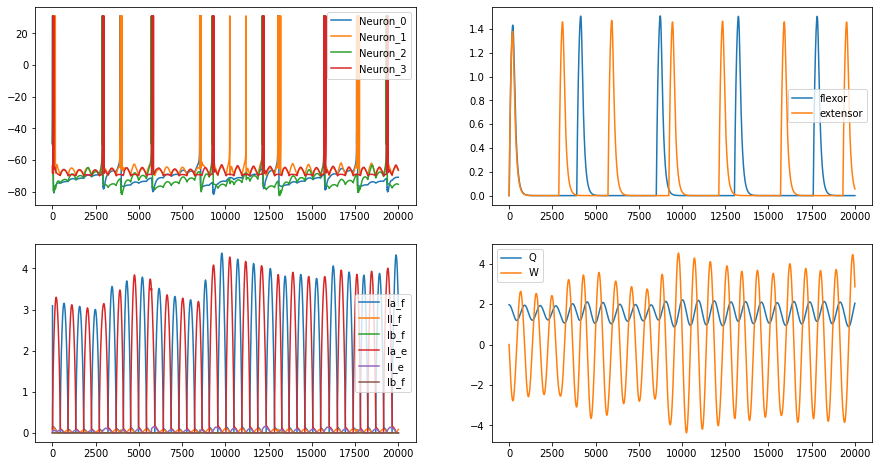

In [8]:
V, F_flex, F_ext, Afferents, Q, W = run(T, sys, input)
# running system
plt.figure(figsize=(15, 8))
plt.subplot(221)
     
for i in range(N):
    plt.plot(T, V[:, i], label=f"{sys.net.names[i]}")
plt.legend()

plt.subplot(222)
plt.plot(T, F_flex, label='flexor')
plt.plot(T, F_ext, label='extensor')
plt.legend()

plt.subplot(223)
aff_types = ['Ia_f', 'II_f', 'Ib_f', 'Ia_e', 'II_e', 'Ib_f' ]
for i in range(6):
    plt.plot(T, Afferents[:, i], label=aff_types[i])
plt.legend()

plt.subplot(224)
plt.plot(T, Q, label="Q")
plt.plot(T, W, label='W')
plt.legend()
plt.show()